In [23]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd
from astropy.constants import R_sun as R_solar
from astropy.constants import M_sun as M_solar
from astropy.constants import R_jup # find jupiter radius constant
from astropy.constants import M_jup
from matplotlib.animation import FuncAnimation
np.set_printoptions(threshold=sys.maxsize)#show whole array

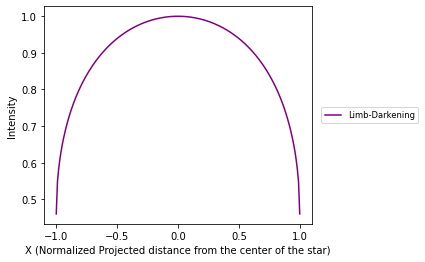

In [24]:
'''the denoting markers are from Wiki : https://en.wikipedia.org/wiki/Limb_darkening'''

R2 = np.linspace(-1,1,201) # grid
Radius = 1
distance = 100000000000 #10**11 # unit:m

theta2_list = []
mu_list = []

nor_const = 1
c1 = 0.44
c2 = 0.1

Ien2 = []

for i_293 in R2:
    theta2 = np.arctan(i_293/distance)
    theta2_list.append(theta2)
    
#     print(theta2)
    mu = (1- (theta2/(Radius/distance))**2)**(0.5) # cos(psi), the marker used to denote angle is from Wiki.
    mu_list.append(mu)
    
    I = nor_const - c1*(1-mu)-c2*(1-mu)**2
    
    Ien2.append(I)




plt.figure()
ax = plt.subplot(111)

plt.plot(R2,Ien2,color='#800080',linestyle='-',label='Limb-Darkening') #purple

plt.xlabel('X (Normalized Projected distance from the center of the star)')
plt.ylabel('Intensity')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#plot legend
ax.legend(loc='center left',bbox_to_anchor=(1.02,0.5),ncol=1,fontsize='small')

#plt.title('X(Normalized projected distance from the center of star) vs Intensity')
plt.show()


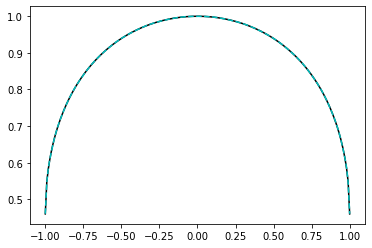

In [25]:
# find the function of intensity curve

plt.plot(R2,Ien2,'k-')
fit_parameter = np.polyfit(R2,Ien2,28) # fitting parameters of intensity curve
fit_fuc = np.poly1d(fit_parameter) # fitting function of above parameters
plt.plot(R2,fit_fuc(R2),'c--')
plt.show()

In [26]:
'''內差法 reference: https://blog.csdn.net/hfutdog/article/details/87386901'''
def LD_fitfuc(r, R_n,Ien_n):
    return np.interp(r, R_n, Ien_n)
def p(t,v):
    return -(R*np.sqrt(1-b**2)+Rp)+v*t

In [27]:
'''basic parameters'''
R = 1 # radius of host star
Rp = 0.138 # planet radius, unit: R

semi_maj = 5.738*R # semi-major axis, unit: R
inc = 89*np.pi/180 # inclination angle, unit: degree -> pi
sig = 1.38*10**-23 # boltzmann constant # unit: R^2 kg s^-2 K^-1
Tspot = 4780 # unit: K
Teff = 5780 # unit: K
b = semi_maj/R*np.cos(inc)
orbital_period = 1.4857108 # unit: day
v = 2*np.pi*semi_maj/orbital_period
T_star = 12.4 # stellar rotational period, unit: d
V_r = 2*np.pi*R/T_star # stellar rotational velocity. unit: R/d
# print(b)

time_b_end = (R*np.sqrt(1-b**2) + 0.5*R)*orbital_period/(np.pi*semi_maj)
time_b = np.linspace(0,time_b_end,300)
# bond = (R*np.sqrt(1-b**2) + 0.5*R)
bond = 1.5

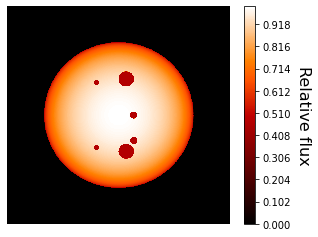

<Figure size 432x288 with 0 Axes>

In [29]:
'''Tspot = 4780 K'''
Ien0 = []
x = np.linspace(-bond,bond,601)
y = np.linspace(-bond,bond,601)

initial_pos = 0.1 # spot1 & 2 initial_position
initial_pos2 = 0.2 # spot3 & 4
initial_pos3 = -0.3 # spot5 & 6
Rspot = 0.8*Rp # spot 1 & 2 radius
Rspot2 = 0.4*Rp # spot 3 & 4 radius
Rspot3 = 0.3*Rp # spot 5 & 6 radius


xx,yy = np.meshgrid(x,y)
for j in np.linspace(-bond,bond,601):
    for i in np.linspace(-bond,bond,601):
        r = np.sqrt(i**2+j**2) # position to the center
#         r_p = np.sqrt((i-p(ss,v))**2+(j-b*R)**2) # spot position
        r_spot = np.sqrt((i-initial_pos)**2+(j-0.5)**2) # spot position
        r_spot2 = np.sqrt((i-initial_pos)**2+(j-(-0.5))**2) # spot position
        r_spot3 = np.sqrt((i-initial_pos2)**2+(j-0)**2) # equator_spot position
        r_spot4 = np.sqrt((i-initial_pos2)**2+(j-(-0.35))**2) # spot position
        r_spot5 = np.sqrt((i-initial_pos3)**2+(j-0.45)**2) # spot position
        r_spot6 = np.sqrt((i-initial_pos3)**2+(j-(-0.45))**2) # spot position
        if r > R:
            I = 0
#         elif r_p <= Rp:
#             I = 0
        elif r_spot<=Rspot or r_spot2<=Rspot or r_spot3<=Rspot2 or r_spot4<=Rspot2 or r_spot5<=Rspot3 or r_spot6<=Rspot3:
            if (r_spot or r_spot2 or r_spot3 or r_spot4 or r_spot5 or r_spot6) == 0:
                pass
            else:
                I = (Tspot**4)/(Teff**4)

        else:
            I = LD_fitfuc(r,R2,Ien2)

        Ien0.append(I)
        
Ien0_tot = np.sum(Ien0)

intensity = np.reshape(Ien0,(601,601)) 

plt.figure(figsize=(5,4))

hostLD = plt.contourf(xx,yy,intensity,600,cmap = 'gist_heat')
cbar = plt.colorbar(hostLD)
cbar.ax.set_ylabel('Relative flux',rotation=270,fontsize=16)
cbar.set_label('Relative flux', labelpad=20, y=0.5)
plt.xlabel('Normalized diameter',fontsize=16)
plt.ylabel('Normalized diameter',fontsize=16)

plt.axis('off')
# plt.savefig('quiet_simualate_contour.eps',format='eps',bbox_inches='tight')
# plt.savefig('quiet_simualate_contour.png',format='png',bbox_inches='tight')
plt.show()
plt.clf()

In [38]:
initial_pos2

0.2

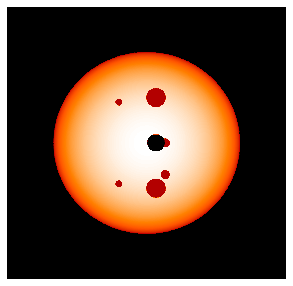

<Figure size 432x288 with 0 Axes>

In [46]:
'''Tspot = 4780 K'''
Ien0 = []
x = np.linspace(-bond,bond,601)
y = np.linspace(-bond,bond,601)
R = 1 # radius of host star
Rp = 0.1 # planet radius, unit: R
Tspot = 4780 # unit: K
Teff = 5780 # unit: K
l_grid = 0.01
n_grid = Rp/l_grid # grid number for planet radius

xx,yy = np.meshgrid(x,y)
for j in np.linspace(-1.5,1.5,601):
    for i in np.linspace(-1.5,1.5,601):
        r = np.sqrt(i**2+j**2) # position to the center
        r_p = np.sqrt((i-(0.1))**2+(j-0)**2) # spot position
        r_spot = np.sqrt((i-initial_pos)**2+(j-0.5)**2) # spot position
        r_spot2 = np.sqrt((i-initial_pos)**2+(j-(-0.5))**2) # spot position
        r_spot3 = np.sqrt((i-initial_pos2)**2+(j-0)**2) # equator_spot position
        r_spot4 = np.sqrt((i-initial_pos2)**2+(j-(-0.35))**2) # spot position
        r_spot5 = np.sqrt((i-initial_pos3)**2+(j-0.45)**2) # spot position
        r_spot6 = np.sqrt((i-initial_pos3)**2+(j-(-0.45))**2) # spot position
        if r > R:
            I = 0
#         elif r_spot <= 0.5*Rp and r <= R:
        elif r_p <= Rp:
            I = 0
        elif r_spot<=Rspot or r_spot2<=Rspot or r_spot3<=Rspot2 or r_spot4<=Rspot2 or r_spot5<=Rspot3 or r_spot6<=Rspot3:
            if (r_spot or r_spot2 or r_spot3 or r_spot4 or r_spot5 or r_spot6) == 0:
                pass
            else:
                I = (Tspot**4)/(Teff**4)
        else:
            I = fit_fuc(r)

        Ien0.append(I)
        
Ien0_tot = np.sum(Ien0)

intensity = np.reshape(Ien0,(601,601)) 

plt.figure(figsize=(5,5))

hostLD = plt.contourf(xx,yy,intensity,600,cmap = 'gist_heat')
# cbar = plt.colorbar(hostLD)
# cbar.ax.set_ylabel('Relative flux',rotation=270)
# cbar.set_label('Relative flux', labelpad=20, y=0.5)
# plt.xlabel('Normalized diameter')
# plt.ylabel('Normalized diameter')

plt.axis('off')

plt.savefig('sim-snapshot-multipleSpots_3.png',format='png',bbox_inches='tight')
plt.show()
plt.clf()

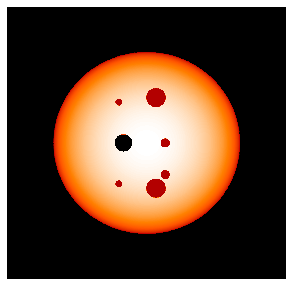

<Figure size 432x288 with 0 Axes>

In [48]:
'''Tspot = 4780 K'''
Ien0 = []
x = np.linspace(-bond,bond,601)
y = np.linspace(-bond,bond,601)
R = 1 # radius of host star
Rp = 0.1 # planet radius, unit: R
Tspot = 4780 # unit: K
Teff = 5780 # unit: K
l_grid = 0.01
n_grid = Rp/l_grid # grid number for planet radius

xx,yy = np.meshgrid(x,y)
for j in np.linspace(-1.5,1.5,601):
    for i in np.linspace(-1.5,1.5,601):
        r = np.sqrt(i**2+j**2) # position to the center
        r_p = np.sqrt((i-(-0.25))**2+(j-0)**2) # spot position
        r_spot = np.sqrt((i-initial_pos)**2+(j-0.5)**2) # spot position
        r_spot2 = np.sqrt((i-initial_pos)**2+(j-(-0.5))**2) # spot position
        r_spot3 = np.sqrt((i-initial_pos2)**2+(j-0)**2) # equator_spot position
        r_spot4 = np.sqrt((i-initial_pos2)**2+(j-(-0.35))**2) # spot position
        r_spot5 = np.sqrt((i-initial_pos3)**2+(j-0.45)**2) # spot position
        r_spot6 = np.sqrt((i-initial_pos3)**2+(j-(-0.45))**2) # spot position
        if r > R:
            I = 0
#         elif r_spot <= 0.5*Rp and r <= R:
        elif r_p <= Rp:
            I = 0
        elif r_spot<=Rspot or r_spot2<=Rspot or r_spot3<=Rspot2 or r_spot4<=Rspot2 or r_spot5<=Rspot3 or r_spot6<=Rspot3:
            if (r_spot or r_spot2 or r_spot3 or r_spot4 or r_spot5 or r_spot6) == 0:
                pass
            else:
                I = (Tspot**4)/(Teff**4)
        else:
            I = fit_fuc(r)

        Ien0.append(I)
        
Ien0_tot = np.sum(Ien0)

intensity = np.reshape(Ien0,(601,601)) 

plt.figure(figsize=(5,5))

hostLD = plt.contourf(xx,yy,intensity,600,cmap = 'gist_heat')
# cbar = plt.colorbar(hostLD)
# cbar.ax.set_ylabel('Relative flux',rotation=270)
# cbar.set_label('Relative flux', labelpad=20, y=0.5)
# plt.xlabel('Normalized diameter')
# plt.ylabel('Normalized diameter')

plt.axis('off')

plt.savefig('sim-snapshot-multipleSpots_2.png',format='png',bbox_inches='tight')
plt.show()
plt.clf()

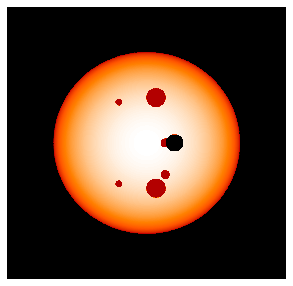

<Figure size 432x288 with 0 Axes>

In [49]:
'''Tspot = 4780 K'''
Ien0 = []
x = np.linspace(-bond,bond,601)
y = np.linspace(-bond,bond,601)
R = 1 # radius of host star
Rp = 0.1 # planet radius, unit: R
Tspot = 4780 # unit: K
Teff = 5780 # unit: K
l_grid = 0.01
n_grid = Rp/l_grid # grid number for planet radius

xx,yy = np.meshgrid(x,y)
for j in np.linspace(-1.5,1.5,601):
    for i in np.linspace(-1.5,1.5,601):
        r = np.sqrt(i**2+j**2) # position to the center
        r_p = np.sqrt((i-(0.3))**2+(j-0)**2) # spot position
        r_spot = np.sqrt((i-initial_pos)**2+(j-0.5)**2) # spot position
        r_spot2 = np.sqrt((i-initial_pos)**2+(j-(-0.5))**2) # spot position
        r_spot3 = np.sqrt((i-initial_pos2)**2+(j-0)**2) # equator_spot position
        r_spot4 = np.sqrt((i-initial_pos2)**2+(j-(-0.35))**2) # spot position
        r_spot5 = np.sqrt((i-initial_pos3)**2+(j-0.45)**2) # spot position
        r_spot6 = np.sqrt((i-initial_pos3)**2+(j-(-0.45))**2) # spot position
        if r > R:
            I = 0
#         elif r_spot <= 0.5*Rp and r <= R:
        elif r_p <= Rp:
            I = 0
        elif r_spot<=Rspot or r_spot2<=Rspot or r_spot3<=Rspot2 or r_spot4<=Rspot2 or r_spot5<=Rspot3 or r_spot6<=Rspot3:
            if (r_spot or r_spot2 or r_spot3 or r_spot4 or r_spot5 or r_spot6) == 0:
                pass
            else:
                I = (Tspot**4)/(Teff**4)
        else:
            I = fit_fuc(r)

        Ien0.append(I)
        
Ien0_tot = np.sum(Ien0)

intensity = np.reshape(Ien0,(601,601)) 

plt.figure(figsize=(5,5))

hostLD = plt.contourf(xx,yy,intensity,600,cmap = 'gist_heat')
# cbar = plt.colorbar(hostLD)
# cbar.ax.set_ylabel('Relative flux',rotation=270)
# cbar.set_label('Relative flux', labelpad=20, y=0.5)
# plt.xlabel('Normalized diameter')
# plt.ylabel('Normalized diameter')

plt.axis('off')

plt.savefig('sim-snapshot-multipleSpots_5.png',format='png',bbox_inches='tight')
plt.show()
plt.clf()

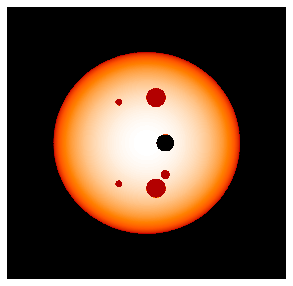

<Figure size 432x288 with 0 Axes>

In [54]:
'''Tspot = 4780 K'''
Ien0 = []
x = np.linspace(-bond,bond,601)
y = np.linspace(-bond,bond,601)
R = 1 # radius of host star
Rp = 0.1 # planet radius, unit: R
Tspot = 4780 # unit: K
Teff = 5780 # unit: K
l_grid = 0.01
n_grid = Rp/l_grid # grid number for planet radius

xx,yy = np.meshgrid(x,y)
for j in np.linspace(-1.5,1.5,601):
    for i in np.linspace(-1.5,1.5,601):
        r = np.sqrt(i**2+j**2) # position to the center
        r_p = np.sqrt((i-(0.2))**2+(j-0)**2) # spot position
        r_spot = np.sqrt((i-initial_pos)**2+(j-0.5)**2) # spot position
        r_spot2 = np.sqrt((i-initial_pos)**2+(j-(-0.5))**2) # spot position
        r_spot3 = np.sqrt((i-initial_pos2)**2+(j-0)**2) # equator_spot position
        r_spot4 = np.sqrt((i-initial_pos2)**2+(j-(-0.35))**2) # spot position
        r_spot5 = np.sqrt((i-initial_pos3)**2+(j-0.45)**2) # spot position
        r_spot6 = np.sqrt((i-initial_pos3)**2+(j-(-0.45))**2) # spot position
        if r > R:
            I = 0
#         elif r_spot <= 0.5*Rp and r <= R:
        elif r_p <= Rp:
            I = 0
        elif r_spot<=Rspot or r_spot2<=Rspot or r_spot3<=Rspot2 or r_spot4<=Rspot2 or r_spot5<=Rspot3 or r_spot6<=Rspot3:
            if (r_spot or r_spot2 or r_spot3 or r_spot4 or r_spot5 or r_spot6) == 0:
                pass
            else:
                I = (Tspot**4)/(Teff**4)
        else:
            I = fit_fuc(r)

        Ien0.append(I)
        
Ien0_tot = np.sum(Ien0)

intensity = np.reshape(Ien0,(601,601)) 

plt.figure(figsize=(5,5))

hostLD = plt.contourf(xx,yy,intensity,600,cmap = 'gist_heat')
# cbar = plt.colorbar(hostLD)
# cbar.ax.set_ylabel('Relative flux',rotation=270)
# cbar.set_label('Relative flux', labelpad=20, y=0.5)
# plt.xlabel('Normalized diameter')
# plt.ylabel('Normalized diameter')

plt.axis('off')

plt.savefig('sim-snapshot-multipleSpots_4.png',format='png',bbox_inches='tight')
plt.show()
plt.clf()

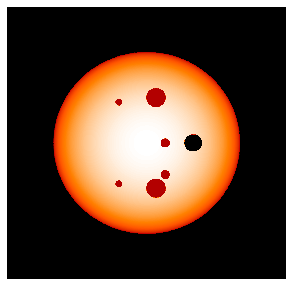

<Figure size 432x288 with 0 Axes>

In [51]:
'''Tspot = 4780 K'''
Ien0 = []
x = np.linspace(-bond,bond,601)
y = np.linspace(-bond,bond,601)
R = 1 # radius of host star
Rp = 0.1 # planet radius, unit: R
Tspot = 4780 # unit: K
Teff = 5780 # unit: K
l_grid = 0.01
n_grid = Rp/l_grid # grid number for planet radius

xx,yy = np.meshgrid(x,y)
for j in np.linspace(-1.5,1.5,601):
    for i in np.linspace(-1.5,1.5,601):
        r = np.sqrt(i**2+j**2) # position to the center
        r_p = np.sqrt((i-(0.5))**2+(j-0)**2) # spot position
        r_spot = np.sqrt((i-initial_pos)**2+(j-0.5)**2) # spot position
        r_spot2 = np.sqrt((i-initial_pos)**2+(j-(-0.5))**2) # spot position
        r_spot3 = np.sqrt((i-initial_pos2)**2+(j-0)**2) # equator_spot position
        r_spot4 = np.sqrt((i-initial_pos2)**2+(j-(-0.35))**2) # spot position
        r_spot5 = np.sqrt((i-initial_pos3)**2+(j-0.45)**2) # spot position
        r_spot6 = np.sqrt((i-initial_pos3)**2+(j-(-0.45))**2) # spot position
        if r > R:
            I = 0
#         elif r_spot <= 0.5*Rp and r <= R:
        elif r_p <= Rp:
            I = 0
        elif r_spot<=Rspot or r_spot2<=Rspot or r_spot3<=Rspot2 or r_spot4<=Rspot2 or r_spot5<=Rspot3 or r_spot6<=Rspot3:
            if (r_spot or r_spot2 or r_spot3 or r_spot4 or r_spot5 or r_spot6) == 0:
                pass
            else:
                I = (Tspot**4)/(Teff**4)
        else:
            I = fit_fuc(r)

        Ien0.append(I)
        
Ien0_tot = np.sum(Ien0)

intensity = np.reshape(Ien0,(601,601)) 

plt.figure(figsize=(5,5))

hostLD = plt.contourf(xx,yy,intensity,600,cmap = 'gist_heat')
# cbar = plt.colorbar(hostLD)
# cbar.ax.set_ylabel('Relative flux',rotation=270)
# cbar.set_label('Relative flux', labelpad=20, y=0.5)
# plt.xlabel('Normalized diameter')
# plt.ylabel('Normalized diameter')

plt.axis('off')

plt.savefig('sim-snapshot-multipleSpots_6.png',format='png',bbox_inches='tight')
plt.show()
plt.clf()

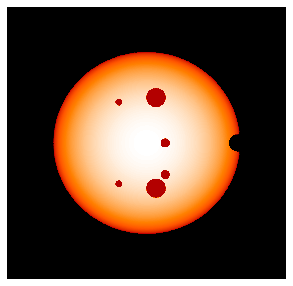

<Figure size 432x288 with 0 Axes>

In [52]:
'''Tspot = 4780 K'''
Ien0 = []
x = np.linspace(-bond,bond,601)
y = np.linspace(-bond,bond,601)
R = 1 # radius of host star
Rp = 0.1 # planet radius, unit: R
Tspot = 4780 # unit: K
Teff = 5780 # unit: K
l_grid = 0.01
n_grid = Rp/l_grid # grid number for planet radius

xx,yy = np.meshgrid(x,y)
for j in np.linspace(-1.5,1.5,601):
    for i in np.linspace(-1.5,1.5,601):
        r = np.sqrt(i**2+j**2) # position to the center
        r_p = np.sqrt((i-(0.98))**2+(j-0)**2) # spot position
        r_spot = np.sqrt((i-initial_pos)**2+(j-0.5)**2) # spot position
        r_spot2 = np.sqrt((i-initial_pos)**2+(j-(-0.5))**2) # spot position
        r_spot3 = np.sqrt((i-initial_pos2)**2+(j-0)**2) # equator_spot position
        r_spot4 = np.sqrt((i-initial_pos2)**2+(j-(-0.35))**2) # spot position
        r_spot5 = np.sqrt((i-initial_pos3)**2+(j-0.45)**2) # spot position
        r_spot6 = np.sqrt((i-initial_pos3)**2+(j-(-0.45))**2) # spot position
        if r > R:
            I = 0
#         elif r_spot <= 0.5*Rp and r <= R:
        elif r_p <= Rp:
            I = 0
        elif r_spot<=Rspot or r_spot2<=Rspot or r_spot3<=Rspot2 or r_spot4<=Rspot2 or r_spot5<=Rspot3 or r_spot6<=Rspot3:
            if (r_spot or r_spot2 or r_spot3 or r_spot4 or r_spot5 or r_spot6) == 0:
                pass
            else:
                I = (Tspot**4)/(Teff**4)
        else:
            I = fit_fuc(r)

        Ien0.append(I)
        
Ien0_tot = np.sum(Ien0)

intensity = np.reshape(Ien0,(601,601)) 

plt.figure(figsize=(5,5))

hostLD = plt.contourf(xx,yy,intensity,600,cmap = 'gist_heat')
# cbar = plt.colorbar(hostLD)
# cbar.ax.set_ylabel('Relative flux',rotation=270)
# cbar.set_label('Relative flux', labelpad=20, y=0.5)
# plt.xlabel('Normalized diameter')
# plt.ylabel('Normalized diameter')

plt.axis('off')

plt.savefig('sim-snapshot-multipleSpots_7.png',format='png',bbox_inches='tight')
plt.show()
plt.clf()

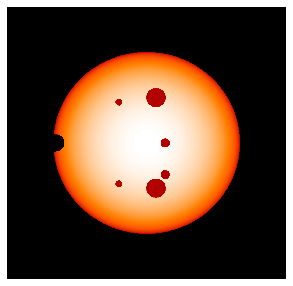

<Figure size 432x288 with 0 Axes>

In [53]:
'''Tspot = 4780 K'''
Ien0 = []
x = np.linspace(-bond,bond,601)
y = np.linspace(-bond,bond,601)
R = 1 # radius of host star
Rp = 0.1 # planet radius, unit: R
Tspot = 4780 # unit: K
Teff = 5780 # unit: K
l_grid = 0.01
n_grid = Rp/l_grid # grid number for planet radius

xx,yy = np.meshgrid(x,y)
for j in np.linspace(-1.5,1.5,601):
    for i in np.linspace(-1.5,1.5,601):
        r = np.sqrt(i**2+j**2) # position to the center
        r_p = np.sqrt((i-(-0.98))**2+(j-0)**2) # spot position
        r_spot = np.sqrt((i-initial_pos)**2+(j-0.5)**2) # spot position
        r_spot2 = np.sqrt((i-initial_pos)**2+(j-(-0.5))**2) # spot position
        r_spot3 = np.sqrt((i-initial_pos2)**2+(j-0)**2) # equator_spot position
        r_spot4 = np.sqrt((i-initial_pos2)**2+(j-(-0.35))**2) # spot position
        r_spot5 = np.sqrt((i-initial_pos3)**2+(j-0.45)**2) # spot position
        r_spot6 = np.sqrt((i-initial_pos3)**2+(j-(-0.45))**2) # spot position
        if r > R:
            I = 0
#         elif r_spot <= 0.5*Rp and r <= R:
        elif r_p <= Rp:
            I = 0
        elif r_spot<=Rspot or r_spot2<=Rspot or r_spot3<=Rspot2 or r_spot4<=Rspot2 or r_spot5<=Rspot3 or r_spot6<=Rspot3:
            if (r_spot or r_spot2 or r_spot3 or r_spot4 or r_spot5 or r_spot6) == 0:
                pass
            else:
                I = (Tspot**4)/(Teff**4)
        else:
            I = fit_fuc(r)

        Ien0.append(I)
        
Ien0_tot = np.sum(Ien0)

intensity = np.reshape(Ien0,(601,601)) 

plt.figure(figsize=(5,5))

hostLD = plt.contourf(xx,yy,intensity,600,cmap = 'gist_heat')
# cbar = plt.colorbar(hostLD)
# cbar.ax.set_ylabel('Relative flux',rotation=270)
# cbar.set_label('Relative flux', labelpad=20, y=0.5)
# plt.xlabel('Normalized diameter')
# plt.ylabel('Normalized diameter')

plt.axis('off')

plt.savefig('sim-snapshot-multipleSpots_1.png',format='png',bbox_inches='tight')
plt.show()
plt.clf()

# simulated LC of multiple spots 

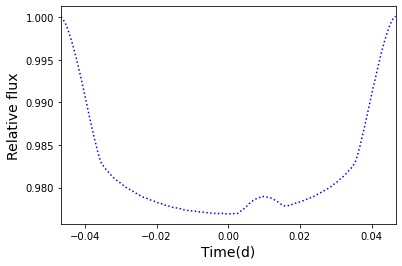

<Figure size 432x288 with 0 Axes>

In [80]:
data_SpotOnPath = np.loadtxt('/sciproc/disk03/fiona/Kepler-17_simulation/K-17_gridsimulation_cases_spotsOnPath.txt')
time_SpotOnPath = data_SpotOnPath[:,0]
flux_SpotOnPath = data_SpotOnPath[:,1]
mid = np.mean(time_SpotOnPath)
time_SpotOnPath_2 = time_SpotOnPath - mid
plt.plot(time_SpotOnPath_2,flux_SpotOnPath, linestyle = 'dotted', color = 'blue')
plt.xlabel('Time(d)', fontsize = 14)
plt.ylabel('Relative flux', fontsize = 14)
plt.xlim(np.min(time_SpotOnPath_2), np.max(time_SpotOnPath_2))

plt.savefig('sim-snapshot-multipleSpots_LC.png',format='png',bbox_inches='tight')
plt.show()
plt.clf()